In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_context('notebook', font_scale=1.5)

# Data Science Stack

The following exercises give practice in the use of the Python data science stack, especially `pandas` for data manipulation and `seaborn` for quick statistical plotting.

**1**. (40 points) Read in the CSV file `pokemon.csv` in the local directory (Source: Kaggle). Do the following:

- Calculate the number of rows and columns in the data frame (5 points)
- Drop the column `Type 2` without creating a copy of the data frame i.e. in-place (5 points)
- Show a table with 5 rows sampled at random without replacement (5 points)
- Sort the data frame in descending order of `Speed` in-place (5 points)
- Create a column 'Value' where `value = 3*HP + 2*Attack + 1*Defense` (5 points)
- Drop all rows that have the string `Forme` in the `Name` column in-place (5 points)
- Find the mean and variance of `Attack` and `Defense` attributes of all the Type 1 AND Generation subgroups. For instance, one such group would be (Grass, 1). (10 points)

Note: If you change the data frame, print out the first 3 rows after each change with the `head` method.

In [4]:
# Your answer here






In [7]:
pd.read_csv('pokemon.csv').head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [6]:
df1 = pd.read_csv('pokemon.csv')
df1.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [7]:
df1.shape

(800, 13)

In [8]:
df1.drop('#', axis=1, inplace=True)
df1.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [9]:
df1.sample(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
763,Clawitzer,Water,NaN,500,71,73,88,120,89,59,6,False
709,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True
495,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False


In [10]:
df1.sort_values('Speed', ascending=False, inplace=True)
df1.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True


In [11]:
df1['Value'] = 3*df1['HP'] + 2*df1['Attack'] + 1*df1['Defense']
df1.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
431,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,430
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,408
428,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,500


In [12]:
rows = df1[df1['Name'].str.contains('Forme')].index
df1.drop(rows, axis=0, inplace=True)
df1.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,408
154,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,595
71,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False,330


In [13]:
grouped = df1.groupby(['Type 1', 'Generation'])
summary = grouped[['Attack', 'Defense']].agg(['mean', 'var'])
summary.head(10)

Attack                 Defense             
                         mean          var       mean          var
Type 1 Generation                                                 
Bug    1            76.428571  2070.879121  60.357143   667.170330
       2            85.416667  2879.356061  93.750000  3227.840909
       3            55.833333   429.969697  54.083333   240.265152
       4            62.600000   655.377778  70.200000   707.288889
       5            77.611111   756.369281  78.277778   585.506536
       6            36.333333   226.333333  50.000000   100.000000
Dark   2            80.833333   214.166667  62.833333   940.166667
       3            97.500000  1267.500000  70.833333   894.166667
       4           111.666667   358.333333  69.000000   373.000000
       5            81.384615   474.089744  71.692308   618.897436

**2**. (30 points) Using the same Pokemon data frame, do the following:
    
- Create a new data frame with the following columns `Name`, `Type 1`, `Generation`, `Feature`, `Score` where `Name`, `Type 1`, `Generation` have the same meaning as in the original data frame, `Feature` is a column containing one of the following strings `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed` and `Score` is the numerical value of the feature. This is known as going from wide-to-tall formats. In R, this operation can be done using the `gatehr` function from the `tidyr` package. (10 points)
- Using the new data frame and the `seaborn` package, create a grid of box plots where the x-axis the Features, the y-axis shows the 'Score', the rows are the Type 1 values, and the columns are the Generation values.  (10 points)
- Using `seaborn`, make a `cluster map` showing the mean values of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def` and 	`Speed`   for each `Type 1` Pokemon. Rotate the Type 1 lables so they are readable. (10 points)

In [14]:
# Your answer here






In [9]:
df1a = pd.melt(df1, id_vars=['Name', 'Type 1', 'Generation'], 
               value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
               var_name='Feature', value_name='Score')
df1a.head(3)

,Name,Type 1,Generation,Feature,Score
0,Bulbasaur,Grass,1,HP,45
1,Ivysaur,Grass,1,HP,60
2,Venusaur,Grass,1,HP,80


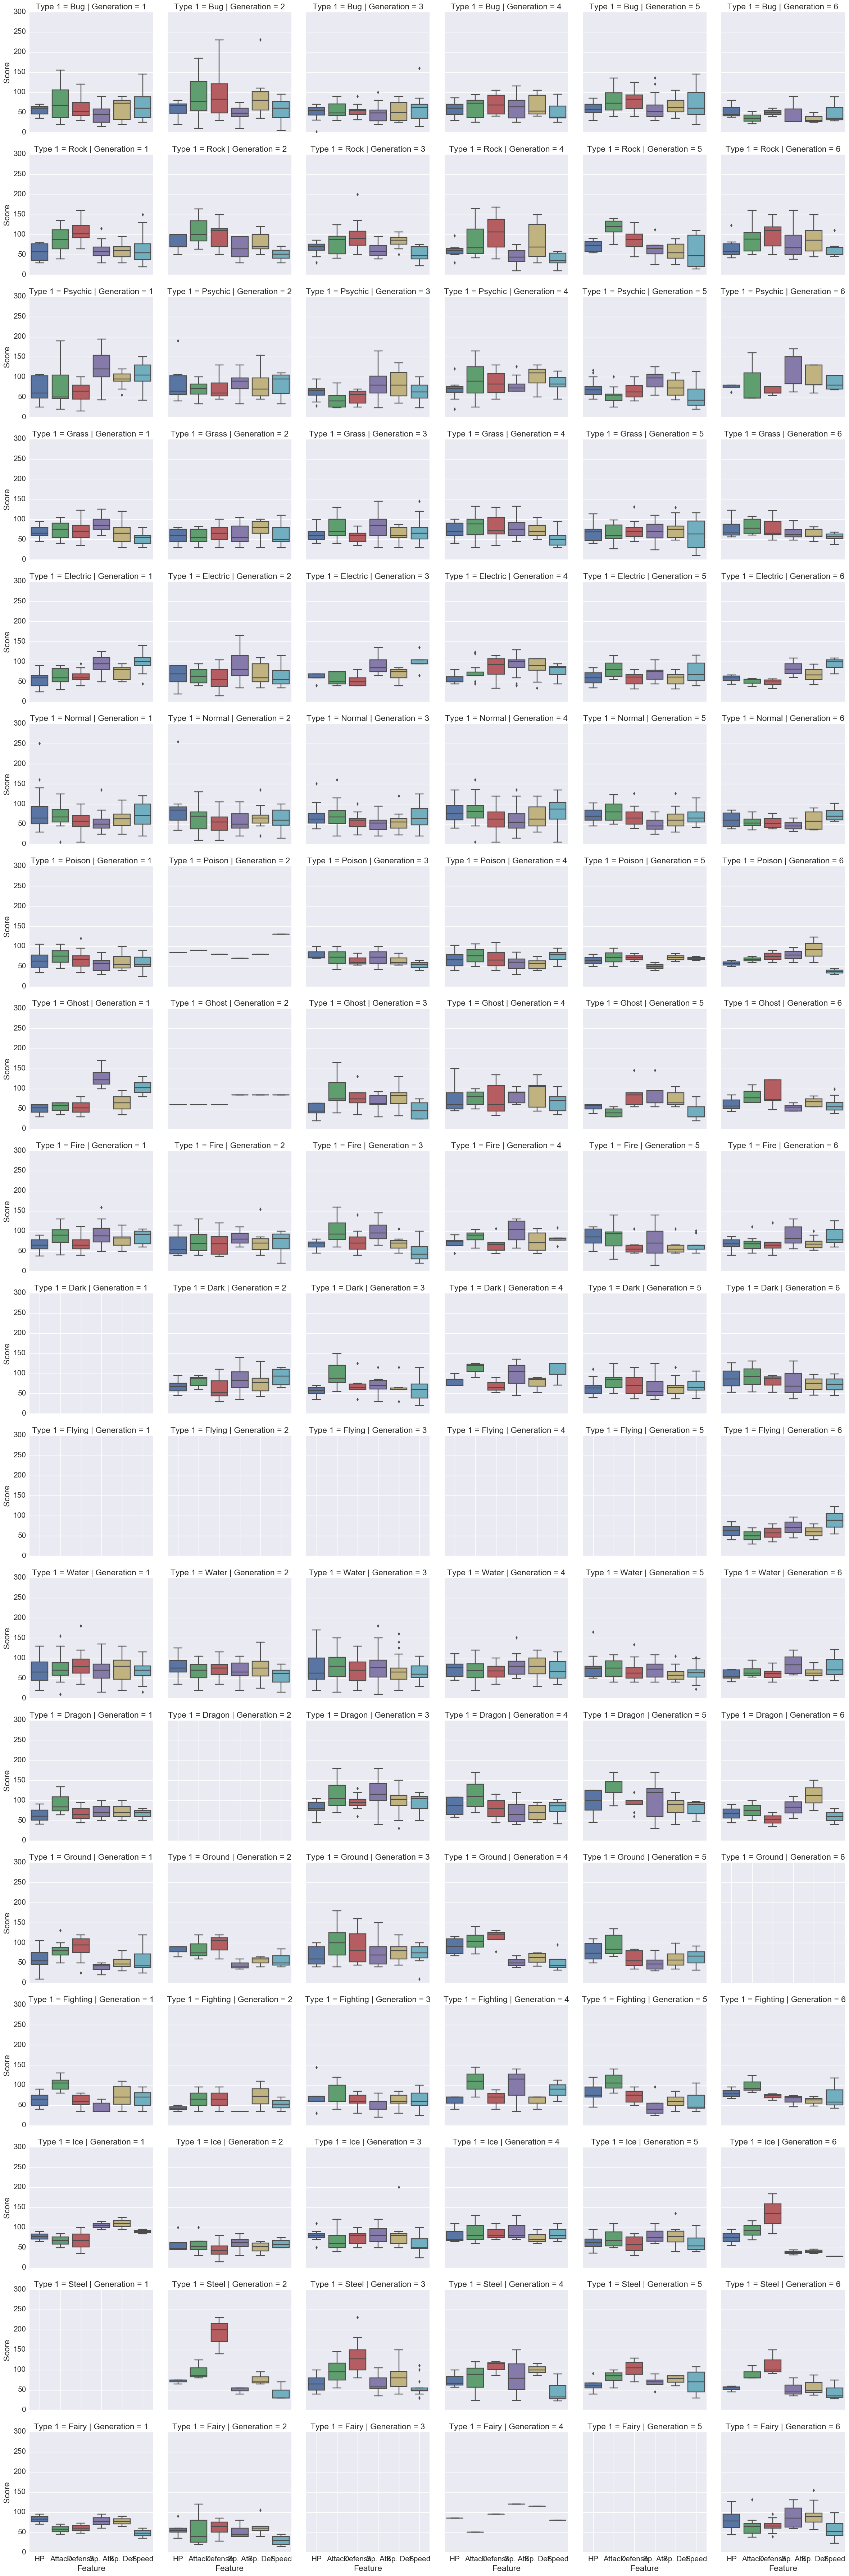

In [16]:
sns.factorplot(x='Feature', y='Score', row='Type 1', col='Generation',
              kind='box', data=df1a)
pass

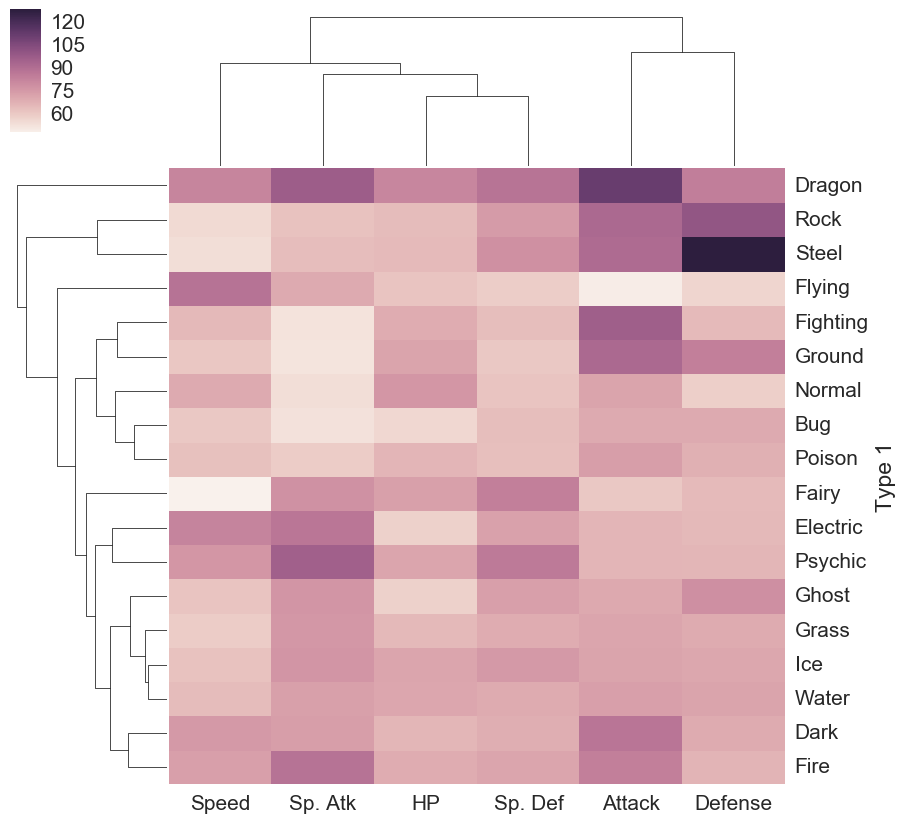

In [17]:
df1b = df1.groupby('Type 1')['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'].mean()
cg = sns.clustermap(df1b)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
pass

**3**. (30 points) Read in the CSV file `pokemonGo.csv` in the local directory (Source: Kaggle). Do the following:
    
- Create a new data frame with that combines columns from the `pokemon.csv` and `pokemonGO.csv` files. Drop any row that does not have `Name`, `Type 1` and	`Type 2` values that are exactly the same in both data frames. (10 points)
- Write a loop to download the images of Pokemon whose speed is greater than 120. (10 points)
- Display these Pokemon images in the Jupyter notebook. (10 points)

In [10]:
# Your answer here






In [11]:
df2 = pd.read_csv('pokemonGO.csv')
df2.head(3)

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...


In [12]:
df = pd.merge(df1, df2)
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokemon No.,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...


In [13]:
import os
import urllib

In [14]:
urls = df[df['Speed'] > 120]['Image URL']
for url in urls:
    name = os.path.split(url)[1]
    urllib.request.urlretrieve(url, name)

In [15]:
from IPython.display import display, Image

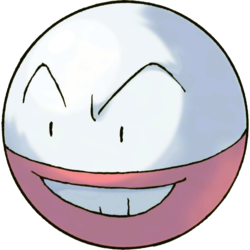

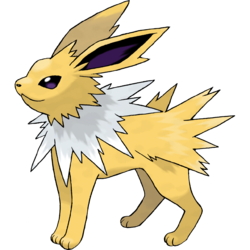

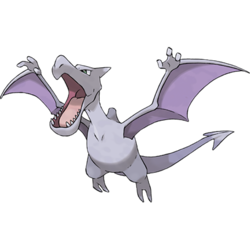

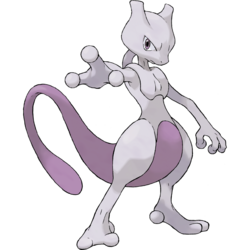

In [16]:
for url in urls:
    name = os.path.split(url)[1]
    display(Image(name, width=100))

#### Alternative solution

In [17]:
from scipy.misc import imread

In [18]:
imgs = []
for url in urls:
    name = os.path.split(url)[1]
    imgs.append(imread(name))

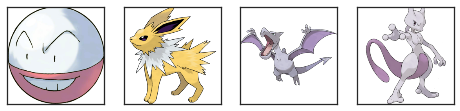

In [19]:
sns.set_style('white')
fig, axes = plt.subplots(1, 4)
for i, img in enumerate(imgs):
    axes[i].imshow(img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])